In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline

# Precipitation Prediction

In this assignment, we conducted precipitation forecasting based on hourly weather data from 2 weather stations in Brazil. Due to the limitation of working hours and data recording, the dataset contains some errors and missing values. We set up logistic regression and linear regression models based on minimally cleaned dataset and thoroughly cleaned dataset respectively and figured out that data cleaning and outlier removing improve the prediction performance a lot. 
<br>Detailed procedures are as follows:

- [Observe data](#observe)
- [Choose a city](#city)
 - [Thorough cleaning](#clean)
 - [Feature engineering](#feature)
- [Predictive modeling](#model)
 - [Logistic regression](#lr)
 - [Linear regression](#linear)
- [Predict with zero-filling](#zero)
- [Bonus: the other city](#bonus)
 

### Observe data
<a id='observe'></a>

In [3]:
df = pd.read_csv('data.csv', index_col=None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 31 columns):
wsid    165000 non-null int64
wsnm    165000 non-null object
elvt    165000 non-null int64
lat     165000 non-null float64
lon     165000 non-null float64
inme    165000 non-null object
city    165000 non-null object
prov    165000 non-null object
mdct    165000 non-null object
date    165000 non-null object
yr      165000 non-null int64
mo      165000 non-null int64
da      165000 non-null int64
hr      165000 non-null int64
prcp    20932 non-null float64
stp     165000 non-null float64
smax    165000 non-null float64
smin    165000 non-null float64
gbrd    95944 non-null float64
temp    165000 non-null float64
dewp    165000 non-null float64
tmax    165000 non-null float64
dmax    165000 non-null float64
tmin    165000 non-null float64
dmin    165000 non-null float64
hmdy    165000 non-null int64
hmax    165000 non-null int64
hmin    165000 non-null int64
wdsp    154867 non-

There are in total 165000 records with 31 features. Missing values are observed in 'prcp', 'gbrd', 'wdsp', 'gust'.

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
wsid,165000,NaN,NaN,NaN,243.873,62.4091,178,178,303,303,303
wsnm,165000,2,VITÓRIA,86952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elvt,165000,NaN,NaN,NaN,116.848,113.834,9,9,9,237,237
lat,165000,NaN,NaN,NaN,-13.9159,6.70789,-20.2711,-20.2711,-20.2711,-6.83578,-6.83578
lon,165000,NaN,NaN,NaN,-39.3626,0.995793,-40.3061,-40.3061,-40.3061,-38.3116,-38.3116
inme,165000,2,A612,86952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,165000,2,Vitória,86952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prov,165000,2,ES,86952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mdct,165000,86952,2009-12-01 20:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,165000,3623,2008-07-06,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check other features.
- I don't think we can drop any feature except prov, city, wsid, wsnm, date, mdct
- elvt: now we don't really know the meaning of this feature; need further check
- log, lat seems okay according to the [geographical location of Brazil](https://www.quora.com/What-is-the-latitude-and-longitude-extent-of-Brazil)
- yr: there's not data from pre-2006 years

In [8]:
df.prcp.isnull().value_counts()

True     144068
False     20932
Name: prcp, dtype: int64

Only 1/8 of all records have values in target variable. We assume that after filling the empty entries, the model would be to certain degree diverged from the true distribution of the data (but we have no choice...)

We also observed that in the csv file, there are regions completely filled with zeros, including features such as 'temp' and 'wdsp', which have a very small odds to be zero. Thus, there must be some error for these records, and we chose to directly drop them. 

In [4]:
# remove all zero records
to_drop = df[(df.prcp==0)&(df.temp==0)].index
df.drop(to_drop, inplace=True)
print(len(to_drop), df.shape)

11833 (153167, 31)


In [5]:
df.prcp.isnull().value_counts()

True     144068
False      9099
Name: prcp, dtype: int64

In [6]:
len(df.loc[(df['prcp'] != 0) & (~df.prcp.isnull())])

9097

After dropping erroneous records, there are even fewer with non-empty prcp. And even more extremely, there are only 2 records that we are sure that for that hour there is zero precipitation; for others, we could only guess for the real situation...

In [7]:
df.city.value_counts()

Vitória        85925
São Gonçalo    67242
Name: city, dtype: int64

In [8]:
len(df.loc[(df['prcp'] != 0) & (~df.prcp.isnull()) & (df.city=='Vitória')])

7076

We chose Vitória because there are more useful data points (7000+/9000+).

### Choose a city
<a id='city'></a>

#### Thorough cleaning
<a id='clean'></a>

In [9]:
dfv = df[df['city'] == 'Vitória'].copy()
dfv.shape

(85925, 31)

In [10]:
for col in ['prcp', 'gbrd', 'wdsp', 'gust']:
    print('\n' + col)
    print(dfv[col].isnull().value_counts())


prcp
True     78849
False     7076
Name: prcp, dtype: int64

gbrd
False    49796
True     36129
Name: gbrd, dtype: int64

wdsp
False    85925
Name: wdsp, dtype: int64

gust
False    85925
Name: gust, dtype: int64


In [12]:
dfv.prcp.fillna(value=0, inplace=True)
print(dfv.prcp.isnull().value_counts())

False    85925
Name: prcp, dtype: int64


We chose to fill 'prcp' with zero, assuming the empty entries mean that for that hour the station didn't observe precipitation. We though about filling with monthly average precipitation, but then there is almost no records with a binary target of 0, which is not good for the model.

In [13]:
# fill gbrd with hourly average
dfv[['hr', 'gbrd']].groupby('hr').mean()

,gbrd
hr,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN


In [14]:
gbrd = dfv[['hr', 'gbrd']].groupby('hr').mean()
gbrd.fillna(value=0, inplace=True)
avg_gbrd_per_hour = gbrd.values.ravel().tolist()
for i in range(0,24):
    dfv.loc[(dfv.hr==i)&(dfv.gbrd.isnull()), 'gbrd'] = avg_gbrd_per_hour[i-1]
dfv.gbrd.isnull().value_counts()

False    85925
Name: gbrd, dtype: int64

We chose to fill 'gbrd' with hourly average. This variable means solar radiation, and from common sense we are quite sure that each hour of the day the radiation value would be to certain degree similar.

Text(0.5,1,'smax')

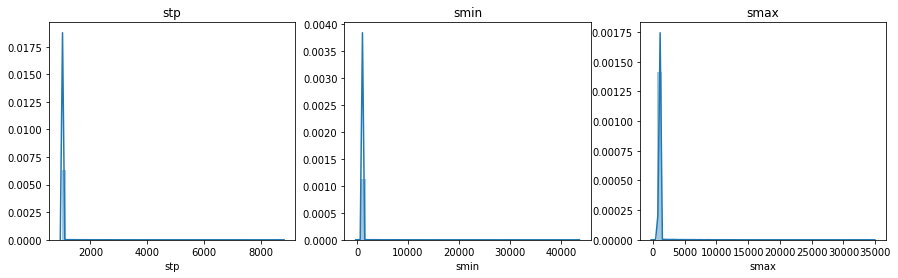

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.distplot(dfv.stp, ax=axes[0])
sns.distplot(dfv.smin, ax=axes[1])
sns.distplot(dfv.smax, ax=axes[2])
axes[0].set_title('stp')
axes[1].set_title('smin')
axes[2].set_title('smax')

# highly right skewed

In [16]:
dfv.loc[dfv.stp > 6000, 'stp']

80207     6512.5
82875     6332.2
92432     8554.8
101577    6709.7
108128    6509.5
111273    7298.8
115198    6097.4
119957    7169.4
124182    6124.4
130361    6854.8
130612    6629.7
132941    8500.9
137309    6626.9
139065    8766.7
155411    6473.9
Name: stp, dtype: float64

In [19]:
# for col in ['stp', 'smin', 'smax']:
for col in ['stp']:
    dfv['zscore'] = np.abs(stats.zscore(dfv[col]))
    print('\n' + col)
    to_drop = dfv[dfv.zscore >= 3].index   
    print('# data to remove:', len(to_drop))
    dfv.drop(to_drop, axis=0, inplace=True)
    print('# data remained:', dfv.shape[0])
    dfv.drop('zscore', axis=1, inplace=True)


stp
# data to remove: 859
# data remained: 83486


Text(0.5,1,'smax')

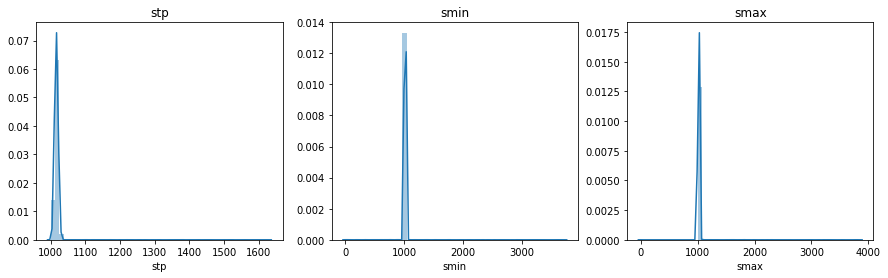

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.distplot(dfv.stp, ax=axes[0])
sns.distplot(dfv.smin, ax=axes[1])
sns.distplot(dfv.smax, ax=axes[2])
axes[0].set_title('stp')
axes[1].set_title('smin')
axes[2].set_title('smax')

# but.... still right skewed

For variables related to air pressure, we plotted the ditributions before and after removing outliers. We consider those with values 3 standard derivation from mean as outliers by calculating the z-score. After outlier removal, the distributions are still right skewed. We hypothesized that for non-raining days the air pressure is low while for raining days it's high, and there are far more non-raining days in the city of Vitória than raining ones. This also fit our action to fill zero for 'prcp'.

#### Feature engineering
<a id='feature'></a>

In [21]:
# add binary target for logistic regression
dfv['rain'] = 0
dfv.loc[dfv.prcp > 0, 'rain'] = 1
dfv.rain.value_counts()

0    76410
1     7076
Name: rain, dtype: int64

In [22]:
dfv.elvt.value_counts()

9    83486
Name: elvt, dtype: int64

In [23]:
dfv.drop(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'date', 'mdct'], axis=1, inplace=True)
dfv = dfv.reset_index(drop=True)
dfv.head()

,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,...,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,rain
0,2006,10,31,16,0.0,1010.9,1011.8,1010.9,2477.841,27.4,...,22.5,26.2,21.2,72,76,71,4.3,28,10.3,0
1,2006,10,31,17,1.0,1010.6,1011.0,1010.5,2733.717,26.0,...,22.3,26.0,20.3,71,74,66,5.9,25,12.1,1
2,2006,10,31,18,0.0,1010.3,1010.6,1010.2,1771.085,26.3,...,22.3,25.3,20.6,79,81,71,4.6,37,12.1,0
3,2006,10,31,19,0.0,1009.8,1010.3,1009.7,1619.683,26.0,...,22.2,26.0,21.3,77,79,73,5.6,28,11.5,0
4,2006,10,31,20,0.0,1010.3,1010.4,1009.7,496.554,25.2,...,22.0,25.2,21.5,82,82,76,4.5,14,10.9,0


For binary classification task, we added a binary variable 'rain' to represent whether the hour observed precipitation. We had though of grouping the record according to hour and take the mean of each variable, but it turned out no need to group because there are only hourly records. We dropped 'elvt', it's the same for all records.

In [24]:
tmp1 = dfv.shift(periods=1)
tmp1.head()

,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,...,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,rain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006.0,10.0,31.0,16.0,0.0,1010.9,1011.8,1010.9,2477.841,27.4,...,22.5,26.2,21.2,72.0,76.0,71.0,4.3,28.0,10.3,0.0
2,2006.0,10.0,31.0,17.0,1.0,1010.6,1011.0,1010.5,2733.717,26.0,...,22.3,26.0,20.3,71.0,74.0,66.0,5.9,25.0,12.1,1.0
3,2006.0,10.0,31.0,18.0,0.0,1010.3,1010.6,1010.2,1771.085,26.3,...,22.3,25.3,20.6,79.0,81.0,71.0,4.6,37.0,12.1,0.0
4,2006.0,10.0,31.0,19.0,0.0,1009.8,1010.3,1009.7,1619.683,26.0,...,22.2,26.0,21.3,77.0,79.0,73.0,5.6,28.0,11.5,0.0


In [25]:
tmp = pd.concat([dfv, tmp1], axis=1)
tmp.columns

Index(['yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust', 'rain', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax',
       'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy',
       'hmax', 'hmin', 'wdsp', 'wdct', 'gust', 'rain'],
      dtype='object')

In [26]:
tmp2 = dfv.shift(periods=2)
tmp3 = dfv.shift(periods=3)
tmp = pd.concat([tmp, tmp2, tmp3], axis=1)
tmp.shape

(83486, 88)

In [27]:
tmp.columns = ['yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust', 'rain', 
               'yr1', 'mo1', 'da1', 'hr1', 'prcp1', 'stp1', 'smax1',
       'smin1', 'gbrd1', 'temp1', 'dewp1', 'tmax1', 'dmax1', 'tmin1', 'dmin1', 'hmdy1',
       'hmax1', 'hmin1', 'wdsp1', 'wdct1', 'gust1', 'rain1', 
              'yr2', 'mo2', 'da2', 'hr2', 'prcp2', 'stp2', 'smax2', 'smin2', 'gbrd2', 'temp2',
       'dewp2', 'tmax2', 'dmax2', 'tmin2', 'dmin2', 'hmdy2', 'hmax2', 'hmin2', 'wdsp2',
       'wdct2', 'gust2', 'rain2', 
               'yr3', 'mo3', 'da3', 'hr3', 'prcp3', 'stp3', 'smax3',
       'smin3', 'gbrd3', 'temp3', 'dewp3', 'tmax3', 'dmax3', 'tmin3', 'dmin3', 'hmdy3',
       'hmax3', 'hmin3', 'wdsp3', 'wdct3', 'gust3', 'rain3']

In [28]:
tmp.fillna(method='bfill', inplace=True)
tmp.hr1 = tmp.hr1.astype(int)
tmp.hr2 = tmp.hr2.astype(int)
tmp.da1 = tmp.da1.astype(int)
tmp.da2 = tmp.da2.astype(int)
tmp.mo1 = tmp.mo1.astype(int)
tmp.mo2 = tmp.mo2.astype(int)
tmp.yr1 = tmp.yr1.astype(int)
tmp.yr2 = tmp.yr2.astype(int)

By shifting the whole dataset 3 times and concatenating to the original dataframe, we formed records that contains all the information for the last 3 hours. We further deleted the 'instant' variables. But there might be some gaps due to list-wise removal, meaning the concatenated records do not necessarily represent the last "3" hours, but last 4, 5 hours or even more. We need to further observe these records.

In [29]:
# time_gap = tmp.loc[(tmp.hr != (tmp.hr1+1)%24) | (tmp.hr != (tmp.hr2+2)%24) |
#         (tmp.da != tmp.da1) | (tmp.da != tmp.da2) |
#         (tmp.mo != tmp.mo1) | (tmp.mo != tmp.mo2) |
#         (tmp.yr != tmp.yr1) | (tmp.yr != tmp.yr2)].index
time_gap1 = tmp.loc[(tmp.hr != (tmp.hr1+1)%24)].index
time_gap2 = tmp.loc[(tmp.hr != (tmp.hr2+2)%24)].index
print(len(time_gap1), len(time_gap2))
# there're (possibly) 7000+ that last 3 hrs data not totally available

2443 4794


In [30]:
# either strictly require last 3 hrs and fill wrong hour with all 0s
# or keep the hr2/hr2 vars to let the model judge the discrepancy
# i feel the easiest is the best (?)
# but if hr1/hr2 are kept, to do it justice da/mo/yr should also be kept, but then it's too noisy
# -> only keep hr1/hr2 (shouldave kept mdct...)
tmp['diff_hr1'] = tmp.hr - tmp.hr1
tmp['diff_hr2'] = tmp.hr - tmp.hr2
tmp.loc[tmp.diff_hr1 < 0, 'diff_hr1'] = tmp.diff_hr1 + 24
tmp.loc[tmp.diff_hr2 < 0, 'diff_hr2'] = tmp.diff_hr2 + 24
tmp.loc[time_gap1, ['hr', 'hr1', 'hr2', 'diff_hr1', 'diff_hr2']]

,hr,hr1,hr2,diff_hr1,diff_hr2
0,16,16,16,0,0
5,22,20,19,2,3
27,21,19,18,2,3
35,6,4,3,2,3
47,19,17,16,2,3
58,7,5,4,2,3
99,1,23,22,2,3
102,5,3,2,2,3
110,14,12,11,2,3
180,13,11,10,2,3


From here, there are 2 trategies we considered: either strictly require last 3 hrs and fill wrong hour with all 0s, or keep the hr2/hr2 vars to let the model judge the discrepancy. We chose the second way, because it provides more usefaul data to the model, and we can add variables to record the absolute difference/time interval between hours.

In [31]:
tmp.head()

,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,...,dmin3,hmdy3,hmax3,hmin3,wdsp3,wdct3,gust3,rain3,diff_hr1,diff_hr2
0,2006,10,31,16,0.0,1010.9,1011.8,1010.9,2477.841,27.4,...,21.2,72.0,76.0,71.0,4.3,28.0,10.3,0.0,0,0
1,2006,10,31,17,1.0,1010.6,1011.0,1010.5,2733.717,26.0,...,21.2,72.0,76.0,71.0,4.3,28.0,10.3,0.0,1,1
2,2006,10,31,18,0.0,1010.3,1010.6,1010.2,1771.085,26.3,...,21.2,72.0,76.0,71.0,4.3,28.0,10.3,0.0,1,2
3,2006,10,31,19,0.0,1009.8,1010.3,1009.7,1619.683,26.0,...,21.2,72.0,76.0,71.0,4.3,28.0,10.3,0.0,1,2
4,2006,10,31,20,0.0,1010.3,1010.4,1009.7,496.554,25.2,...,20.3,71.0,74.0,66.0,5.9,25.0,12.1,1.0,1,2


In [32]:
tmp.drop(['yr1', 'mo1', 'da1', 'hr1', 'yr2', 'mo2', 'da2', 'hr2', 'yr3', 'mo3', 'da3', 'hr3',
          'stp1', 'temp1', 'dewp1', 'hmdy1', 'stp2', 'temp2', 'dewp2', 'hmdy2', 'stp3', 'temp3', 'dewp3', 'hmdy3', 
          'prcp3', 'smax3', 'smin3', 'gbrd3', 'tmax3', 'dmax3', 'tmin3', 'dmin3', 'hmax3', 'hmin3', 'wdsp3', 'wdct3', 'gust3', 'rain3'], 
         axis=1, inplace=True)
tmp.shape
# drop last 4th hr; drop instant feature for last 3 hrs

(83486, 52)

In [33]:
tmp.rain.value_counts()

0    76410
1     7076
Name: rain, dtype: int64

We probably will need to use SMOTE in prediction.

### Predictive modeling
<a id='model'></a>

In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error, r2_score

In [35]:
col_list = tmp.columns.tolist()
tmp = tmp[col_list[:4] + col_list[5:21] + col_list[22:] + [col_list[4], col_list[21]]]
tmp.columns
# prcp and rain to the end of the df

Index(['yr', 'mo', 'da', 'hr', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp',
       'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct',
       'gust', 'prcp1', 'smax1', 'smin1', 'gbrd1', 'tmax1', 'dmax1', 'tmin1',
       'dmin1', 'hmax1', 'hmin1', 'wdsp1', 'wdct1', 'gust1', 'rain1', 'prcp2',
       'smax2', 'smin2', 'gbrd2', 'tmax2', 'dmax2', 'tmin2', 'dmin2', 'hmax2',
       'hmin2', 'wdsp2', 'wdct2', 'gust2', 'rain2', 'diff_hr1', 'diff_hr2',
       'prcp', 'rain'],
      dtype='object')

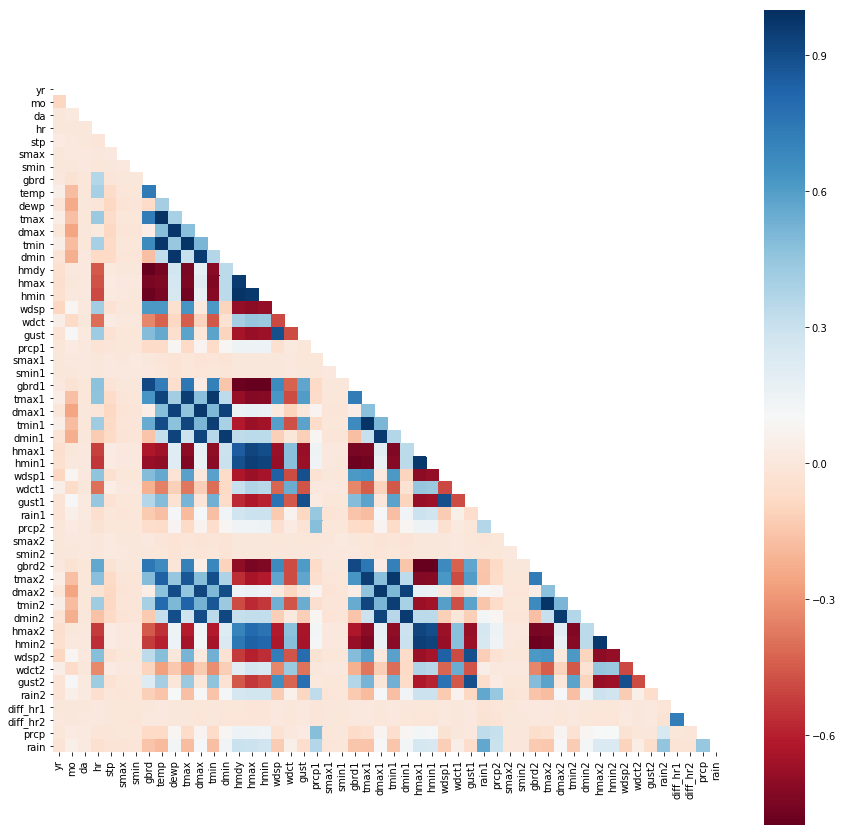

In [36]:
plt.figure(figsize=(15,15))
corr = tmp.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, cmap='RdBu', mask=mask)

Correlation between feature variables:
- Rain or not is heavily correlated to rain1; generally to gbrd, temp, wdsp
- prcp heavily correlated to prcp1

#### Logistic regression
<a id='lr'></a>

In [38]:
# w/o smote
lr = LogisticRegression(solver='liblinear')
x_train, x_test, y_train, y_test = train_test_split(tmp.drop(['prcp', 'rain'], axis=1), tmp['rain'], test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(66788, 50) (16698, 50) (66788,) (16698,)


In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# increased roc_auc_score by 0.05

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


As the scale of variables are quite different (yr is in the scale of ~1000, while prcp is in ~10), we standardized them by removing the mean and scaling to unit variance.

In [40]:
print(lr)
print('\ncross_val_score:', cross_val_score(lr, x_train, y_train, cv=KFold(5)))

lr = lr.fit(x_train, y_train)
preds = lr.predict(x_test)
pred_probas = lr.predict_proba(x_test)

print(classification_report(y_test, preds))
print('\nroc_auc_score:', roc_auc_score(y_test, preds))

# looks like we need smote

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

cross_val_score: [0.95253781 0.94849528 0.9482707  0.95066257 0.9496893 ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15326
           1       0.78      0.60      0.68      1372

   micro avg       0.95      0.95      0.95     16698
   macro avg       0.87      0.79      0.83     16698
weighted avg       0.95      0.95      0.95     16698


roc_auc_score: 0.7944143681595977


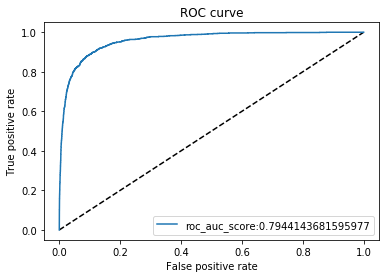

In [41]:
fpr, tpr, _ = roc_curve(y_test, pred_probas[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='roc_auc_score:' + str(roc_auc_score(y_test, preds)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [42]:
# w/ smote
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train.ravel())
print(x_train_sm.shape, y_train_sm.shape)
print(sum(y_train_sm == 1), sum(y_train_sm == 0))

(122168, 50) (122168,)
61084 61084


In [43]:
lrs = LogisticRegression(solver='liblinear')
print(lrs)

lrs = lrs.fit(x_train_sm, y_train_sm)
spreds = lrs.predict(x_test)
spred_probas = lrs.predict_proba(x_test)

print(classification_report(y_test, spreds))
print('\nroc_auc_score:', roc_auc_score(y_test, spreds))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     15326
           1       0.45      0.89      0.59      1372

   micro avg       0.90      0.90      0.90     16698
   macro avg       0.72      0.89      0.77     16698
weighted avg       0.94      0.90      0.91     16698


roc_auc_score: 0.8934236928118874


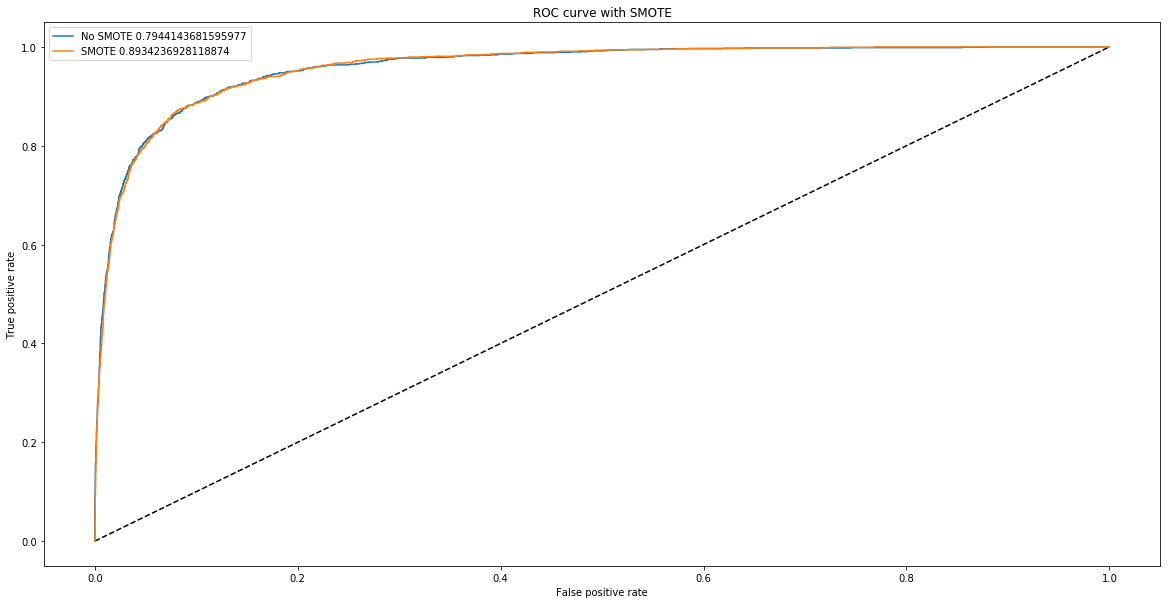

In [44]:
fprs, tprs, _ = roc_curve(y_test, spred_probas[:, 1])
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='No SMOTE ' + str(roc_auc_score(y_test, preds)))
plt.plot(fprs, tprs, label='SMOTE ' + str(roc_auc_score(y_test, spreds)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve with SMOTE')
plt.legend(loc='best')
plt.show()

# ...the line of mo smote is slightly higher than smote????!!!!

Text(0.5,1,'Feature Importances')

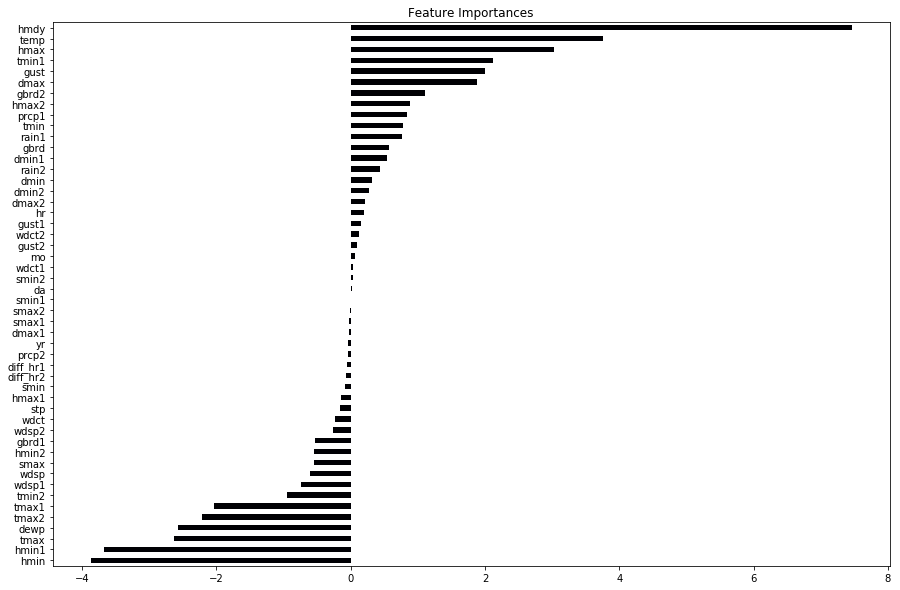

In [45]:
fis = pd.Series(lrs.coef_[0] * np.std(x_train_sm, 0), index=tmp.columns[:-2]).sort_values()
plt.figure(figsize=(15, 10))
fis.plot.barh(cmap='inferno')
plt.title('Feature Importances')

According to the feature importance we drew from logistic regression, we figured out that relative humid, air temperature, wind gust, dew point temperature, solar radiation and precipitation in last few hours are strongly correlated with whether it rains or not.

#### Linear regression
<a id='linear'></a>

In [47]:
# ... why linear regression is also lr ughhh
linear = LinearRegression()
# print('\ncross_val_score:', cross_val_score(linear, x_train_sm, y_train_sm, scoring='r2_score', cv=KFold(5)))
x_train_linear, x_test_linear, y_train_linear, y_test_linear = train_test_split(tmp.drop(['prcp', 'rain'], axis=1), tmp['prcp'], test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

linear = linear.fit(x_train_linear, y_train_linear)
lpreds = linear.predict(x_test_linear)

print('.score:', linear.score(x_train_linear, y_train_linear))
print('\nr2_score:', r2_score(y_test_linear, lpreds))
print('mean_squared_error:', mean_squared_error(y_test_linear, lpreds))

(66788, 50) (16698, 50) (66788,) (16698,)
.score: 0.2737224407692155

r2_score: 0.33729535437331615
mean_squared_error: 1.356306675380677


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


The result is not so good and not as interpretable for regression task. There is no direct comparision for the value of MSE. But a rather low r2 suggests the model cannot fit the data very well. Maybe it is not linearly separable; correlated variables might introduce noise to the model too. So we decided to fit the model with orginal dataframe and have a look.

Text(0.5,1,'Feature Importances')

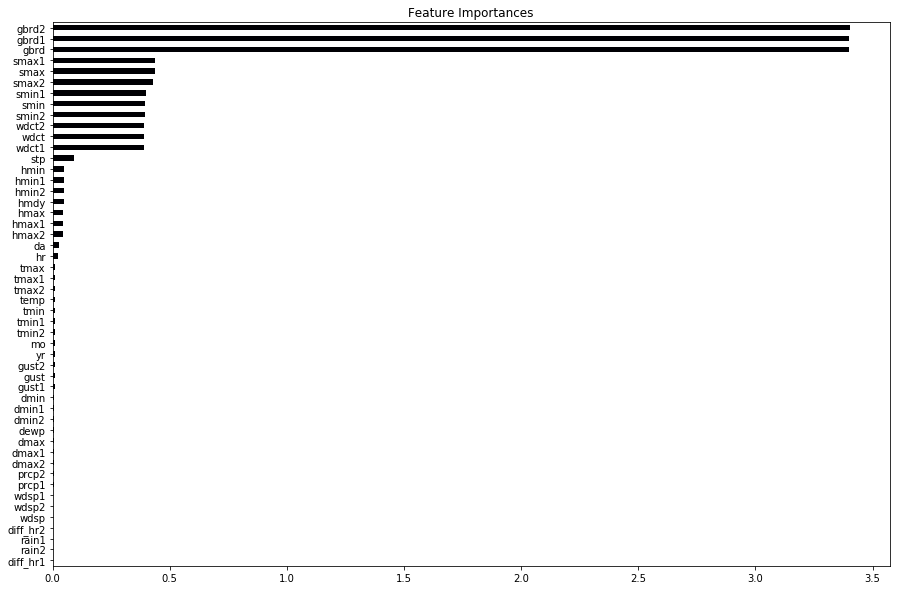

In [53]:
fil = pd.Series(-linear.coef_[0] * np.std(x_train_linear, 0), index=x_train_linear.columns).sort_values()
plt.figure(figsize=(15, 10))
fil.plot.barh(cmap='inferno')
plt.title('Feature Importances')

In the linear regression model, it turns out that solar radiation, air pressure and wind direction from last three hours contribute most to the amount of precipitation.

In [49]:
dfv.columns

Index(['yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust', 'rain'],
      dtype='object')

In [48]:
# linear regression assumes independence of feature variables -> use original records

x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(dfv.drop(['prcp', 'rain'], axis=1), dfv['prcp'], test_size=0.2, random_state=42)

linear_org = LinearRegression()

linear_org = linear_org.fit(x_train_org, y_train_org)
olpreds = linear_org.predict(x_test_org)

print('.score:', linear_org.score(x_train_org, y_train_org))
print('\nr2_score:', r2_score(y_test_org, olpreds))
print('mean_squared_error:', mean_squared_error(y_test, olpreds))

# still v bad

.score: 0.08628084041664863

r2_score: 0.07479651648376395
mean_squared_error: 0.1292044498789276


"Even badder!"

### Predict with zero-filled data
<a id='zero'></a>

We only used logistic regression for the following experiments due to its interpretability.

In [68]:
def last_3_hours(df):
    df.drop(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'date', 'mdct'], axis=1, inplace=True)
    df['rain'] = 0
    df.loc[df.prcp > 0, 'rain'] = 1
    df = df.reset_index(drop=True)
    tmp = pd.concat([df, df.shift(periods=1), df.shift(periods=2)], axis=1)

    tmp.columns = ['yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
           'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
           'wdct', 'gust', 'rain', 
                   'yr1', 'mo1', 'da1', 'hr1', 'prcp1', 'stp1', 'smax1',
           'smin1', 'gbrd1', 'temp1', 'dewp1', 'tmax1', 'dmax1', 'tmin1', 'dmin1', 'hmdy1',
           'hmax1', 'hmin1', 'wdsp1', 'wdct1', 'gust1', 'rain1', 
                  'yr2', 'mo2', 'da2', 'hr2', 'prcp2', 'stp2', 'smax2', 'smin2', 'gbrd2', 'temp2',
           'dewp2', 'tmax2', 'dmax2', 'tmin2', 'dmin2', 'hmdy2', 'hmax2', 'hmin2', 'wdsp2',
           'wdct2', 'gust2', 'rain2']

    tmp.fillna(method='bfill', inplace=True)
    tmp.hr1 = tmp.hr1.astype(int)
    tmp.hr2 = tmp.hr2.astype(int)
    tmp.da1 = tmp.da1.astype(int)
    tmp.da2 = tmp.da2.astype(int)
    tmp.mo1 = tmp.mo1.astype(int)
    tmp.mo2 = tmp.mo2.astype(int)
    tmp.yr1 = tmp.yr1.astype(int)
    tmp.yr2 = tmp.yr2.astype(int)


    time_gap1 = tmp.loc[(tmp.hr != (tmp.hr1+1)%24)].index
    time_gap2 = tmp.loc[(tmp.hr != (tmp.hr2+2)%24)].index
    print(len(time_gap1), len(time_gap2))

    tmp['diff_hr1'] = tmp.hr - tmp.hr1
    tmp['diff_hr2'] = tmp.hr - tmp.hr2
    tmp.loc[tmp.diff_hr1 < 0, 'diff_hr1'] = tmp.diff_hr1 + 24
    tmp.loc[tmp.diff_hr2 < 0, 'diff_hr2'] = tmp.diff_hr2 + 24

    tmp.drop(['yr1', 'mo1', 'da1', 'hr1', 'yr2', 'mo2', 'da2', 'hr2', 
              'stp1', 'temp1', 'dewp1', 'hmdy1', 'stp2', 'temp2', 'dewp2', 'hmdy2'], 
             axis=1, inplace=True)
    print(tmp.shape)
    return tmp

In [69]:
def prepare_train_test(df):
    x_train, x_test, y_train, y_test = train_test_split(df.drop(['prcp', 'rain'], axis=1), df['rain'], test_size=0.2, random_state=42)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    print(sum(y_train == 1), sum(y_train == 0))

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # w/ smote
    sm = SMOTE(random_state=42)
    x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train.ravel())
    print(x_train_sm.shape, y_train_sm.shape)
    print(sum(y_train_sm == 1), sum(y_train_sm == 0))
    return x_train_sm, x_test, y_train_sm, y_test

In [70]:
def fit_eval_model(x_train, x_test, y_train, y_test):
    lr = LogisticRegression(solver='liblinear')
    print(lr)

    lr = lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    pred_probas = lr.predict_proba(x_test)

    print(classification_report(y_test, preds))
    roauc = roc_auc_score(y_test, preds)
    print('\nroc_auc_score:', roauc)
    
    return pred_probas, roauc

In [71]:
def plot_roc_curve(y_test, pred_probas, roauc):
    fpr, tpr, _ = roc_curve(y_test, pred_probas[:, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='SMOTE ' + str(roauc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve with SMOTE')
    plt.legend(loc='best')
    plt.show()

In [58]:
# predict with only fill 0
df0 = pd.read_csv('data.csv', index_col=None)
df0.drop('Unnamed: 0', axis=1, inplace=True)

dfv0 = df[df.city == 'Vitória'].copy()
for col in ['prcp', 'gbrd', 'wdsp', 'gust']:
    dfv0.fillna(value=0, inplace=True)
    print('\n' + col)
    print(dfv0[col].isnull().value_counts())


prcp
False    86952
Name: prcp, dtype: int64

gbrd
False    86952
Name: gbrd, dtype: int64

wdsp
False    86952
Name: wdsp, dtype: int64

gust
False    86952
Name: gust, dtype: int64


In [219]:
tmp0 = last_3_hours(dfv0)

1 2
(86952, 52)


In [221]:
x_train0, x_test0, y_train0, y_test0 = prepare_train_test(tmp0)

(69561, 50) (17391, 50) (69561,) (17391,)
5588 63973


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


(127946, 50) (127946,)
63973 63973


In [223]:
pred_probas0, roauc0 = fit_eval_model(x_train0, x_test0, y_train0, y_test0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     15903
           1       0.44      0.87      0.59      1488

   micro avg       0.90      0.90      0.90     17391
   macro avg       0.72      0.89      0.76     17391
weighted avg       0.94      0.90      0.91     17391


roc_auc_score: 0.8861044299817644


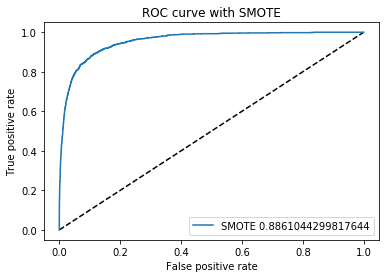

In [225]:
plot_roc_curve(y_test0, pred_probas0, roauc0)
# 这也没差多少啊...

The result is not much lower than "proper" cleaning of data. There are not many variables to be cleaned in the first place, so there's not much difference between filling zero and "proper" cleaning.

# Bonus: the other city
<a id='bonus'></a>

In [59]:
# the other city
dfs = df0[df0.city == 'São Gonçalo'].copy()
for col in ['prcp', 'gbrd', 'wdsp', 'gust']:
    print('\n' + col)
    print(dfs[col].isnull().value_counts())


prcp
True     65219
False    12829
Name: prcp, dtype: int64

gbrd
False    45528
True     32520
Name: gbrd, dtype: int64

wdsp
False    67915
True     10133
Name: wdsp, dtype: int64

gust
False    75542
True      2506
Name: gust, dtype: int64


In [60]:
# remove all zero records
to_drop = dfs[(dfs.prcp==0)&(dfs.temp==0)].index
dfs.drop(to_drop, inplace=True)
print(len(to_drop), dfs.shape)

print(dfs.prcp.isnull().value_counts())

print(len(dfs.loc[(dfs['prcp'] != 0) & (~dfs.prcp.isnull())]))

10806 (67242, 31)
True     65219
False     2023
Name: prcp, dtype: int64
2021


In [61]:
dfs.prcp.fillna(value=0, inplace=True)
print(dfs.prcp.isnull().value_counts())

False    67242
Name: prcp, dtype: int64


In [62]:
gbrd = dfs[['hr', 'gbrd']].groupby('hr').mean()
gbrd.fillna(value=0, inplace=True)
avg_gbrd_per_hour = gbrd.values.ravel().tolist()
for i in range(0,24):
    dfs.loc[(dfs.hr==i)&(dfs.gbrd.isnull()), 'gbrd'] = avg_gbrd_per_hour[i-1]
dfs.gbrd.isnull().value_counts()

False    67242
Name: gbrd, dtype: int64

In [63]:
dfs.wdsp.fillna(method='bfill', inplace=True)
dfs.wdsp.isnull().value_counts()

False    67242
Name: wdsp, dtype: int64

In [64]:
dfs.gust.fillna(method='bfill', inplace=True)
dfs.gust.isnull().value_counts()

False    67242
Name: gust, dtype: int64

We filled wdsp and gust with the value of the previous hour, because wind speed changes continuously.

In [72]:
sg = last_3_hours(dfs)

447 863
(67242, 52)


In [73]:
x_train_sg, x_test_sg, y_train_sg, y_test_sg = prepare_train_test(sg)

(53793, 50) (13449, 50) (53793,) (13449,)
1623 52170


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


(104340, 50) (104340,)
52170 52170


In [74]:
pred_probas_sg, roauc_sg = fit_eval_model(x_train_sg, x_test_sg, y_train_sg, y_test_sg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      0.92      0.95     13051
           1       0.24      0.85      0.37       398

   micro avg       0.92      0.92      0.92     13449
   macro avg       0.62      0.88      0.66     13449
weighted avg       0.97      0.92      0.94     13449


roc_auc_score: 0.8844266347444832


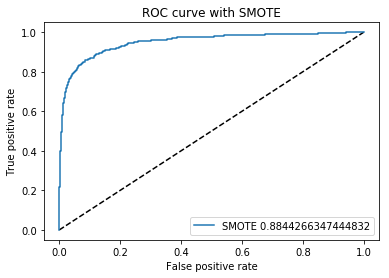

In [214]:
plot_roc_curve(y_test_sg, pred_probas_sg, roauc_sg)

It turns out the model did a similar job on the other city... perhaps the precipitation distribution of the two city are similar, or perhaps it's the model is doing a bad job. We want to try out a baseline by predicting all records to zero. (We should have done this before actually training the model.)

In [83]:
print(classification_report(y_test_sg, [0 for _ in range(y_test_sg.shape[0])]))
print(roc_auc_score(y_test_sg, [0 for _ in range(y_test_sg.shape[0])]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13051
           1       0.00      0.00      0.00       398

   micro avg       0.97      0.97      0.97     13449
   macro avg       0.49      0.50      0.49     13449
weighted avg       0.94      0.97      0.96     13449

0.5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Our model is actually doing work.